In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

In [6]:
# Define the file path. Adjust the username and path to match your local environment.
file_path = '/Users/moritzrichter/Desktop/cryptocurrency_analysis/data/Polkadot_(DOT)/polkadot(fiveyears).csv'

# Load the dataset from the specified file path
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to ensure it has loaded correctly
df.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
0,Polkadot,2024-04-14,7.322462,5.830095,7.241344,6.452436,1.414697e+09,6.883850e+09
1,Polkadot,2024-04-13,8.485889,6.637766,8.398041,7.236212,7.288384e+08,7.936690e+09
2,Polkadot,2024-04-12,8.517427,8.201845,8.390784,8.381547,6.476812e+08,8.250478e+09
3,Polkadot,2024-04-11,8.689573,8.192059,8.648202,8.415371,7.368633e+08,8.330455e+09
4,Polkadot,2024-04-10,9.095918,8.642528,9.039720,8.667247,6.404972e+08,8.796045e+09


In [7]:
# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sorting the DataFrame by the 'Date' column in ascending order
df_sorted = df.sort_values(by='Date', ascending=True)

print(df_sorted)

          Name       Date      High       Low      Open     Close  \
1331  Polkadot 2020-08-22  3.030000  2.857274  2.936117  2.878794   
1330  Polkadot 2020-08-23  4.518678  2.822951  2.867354  4.477365   
1329  Polkadot 2020-08-24  4.486948  3.731285  4.486948  3.974245   
1328  Polkadot 2020-08-25  4.766288  3.820481  3.990420  4.552361   
1327  Polkadot 2020-08-26  5.739077  4.501397  4.571726  5.469447   
...        ...        ...       ...       ...       ...       ...   
4     Polkadot 2024-04-10  9.095918  8.642528  9.039720  8.667247   
3     Polkadot 2024-04-11  8.689573  8.192059  8.648202  8.415371   
2     Polkadot 2024-04-12  8.517427  8.201845  8.390784  8.381547   
1     Polkadot 2024-04-13  8.485889  6.637766  8.398041  7.236212   
0     Polkadot 2024-04-14  7.322462  5.830095  7.241344  6.452436   

            Volume     Marketcap  
1331  5.314102e+07  0.000000e+00  
1330  1.810368e+08  0.000000e+00  
1329  3.623563e+08  0.000000e+00  
1328  2.745461e+08  0.000000e+0

In [8]:
df_sorted.tail()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
4,Polkadot,2024-04-10,9.095918,8.642528,9.039720,8.667247,6.404972e+08,8.796045e+09
3,Polkadot,2024-04-11,8.689573,8.192059,8.648202,8.415371,7.368633e+08,8.330455e+09
2,Polkadot,2024-04-12,8.517427,8.201845,8.390784,8.381547,6.476812e+08,8.250478e+09
1,Polkadot,2024-04-13,8.485889,6.637766,8.398041,7.236212,7.288384e+08,7.936690e+09
0,Polkadot,2024-04-14,7.322462,5.830095,7.241344,6.452436,1.414697e+09,6.883850e+09


In [9]:
df_sorted.shape

(1332, 8)

In [10]:
# Check for null values in the Close column
df_sorted["Close"].isnull().values.any()

False

Text(0.5, 1.0, 'Close Price of Polkadot')

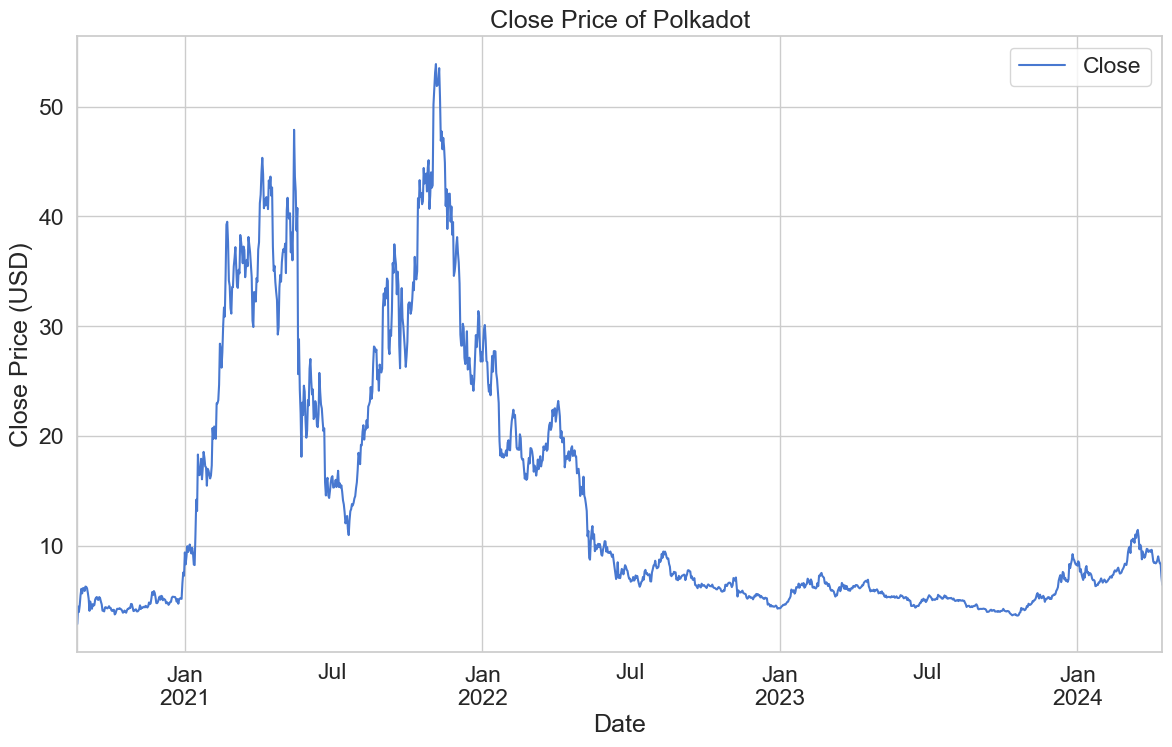

In [11]:
# Visualize the close price over time
ax = df_sorted.plot(x='Date', y='Close')
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
ax.set_title("Close Price of Polkadot")

# Examine the volatility for the year 2023

In [12]:
# Filter the dates for the year 2023
start_date = "2023-01-01"
end_date = "2023-12-31"

after_start_date = df_sorted["Date"] >= start_date
before_end_date = df_sorted["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
year_2023 = df_sorted.loc[between_two_dates]

print(year_2023)

         Name       Date      High       Low      Open     Close  \
469  Polkadot 2023-01-01  4.389025  4.305542  4.322374  4.310723   
468  Polkadot 2023-01-02  4.382929  4.278997  4.310269  4.364916   
467  Polkadot 2023-01-03  4.518445  4.325054  4.369715  4.483210   
466  Polkadot 2023-01-04  4.537022  4.471537  4.487877  4.523266   
465  Polkadot 2023-01-05  4.674906  4.522715  4.522715  4.626480   
..        ...        ...       ...       ...       ...       ...   
109  Polkadot 2023-12-27  9.581449  8.468432  9.246978  8.834521   
108  Polkadot 2023-12-28  9.006520  8.455080  8.804617  8.696583   
107  Polkadot 2023-12-29  8.907637  8.295545  8.670034  8.457684   
106  Polkadot 2023-12-30  8.686430  8.168711  8.467000  8.293566   
105  Polkadot 2023-12-31  8.487859  8.116396  8.299307  8.370620   

           Volume     Marketcap  
469  1.938575e+08  4.281996e+09  
468  1.826140e+08  4.270990e+09  
467  2.674176e+08  4.409971e+09  
466  2.399604e+08  4.449392e+09  
465  3.010789

In [13]:
# Create a new dataframe showing only 2023
df_2023 = pd.DataFrame(data=year_2023)
df_2023.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
469,Polkadot,2023-01-01,4.389025,4.305542,4.322374,4.310723,1.938575e+08,4.281996e+09
468,Polkadot,2023-01-02,4.382929,4.278997,4.310269,4.364916,1.826140e+08,4.270990e+09
467,Polkadot,2023-01-03,4.518445,4.325054,4.369715,4.483210,2.674176e+08,4.409971e+09
466,Polkadot,2023-01-04,4.537022,4.471537,4.487877,4.523266,2.399604e+08,4.449392e+09
465,Polkadot,2023-01-05,4.674906,4.522715,4.522715,4.626480,3.010789e+08,4.573053e+09


Text(0.5, 1.0, 'Close Price of Polkadot in 2023')

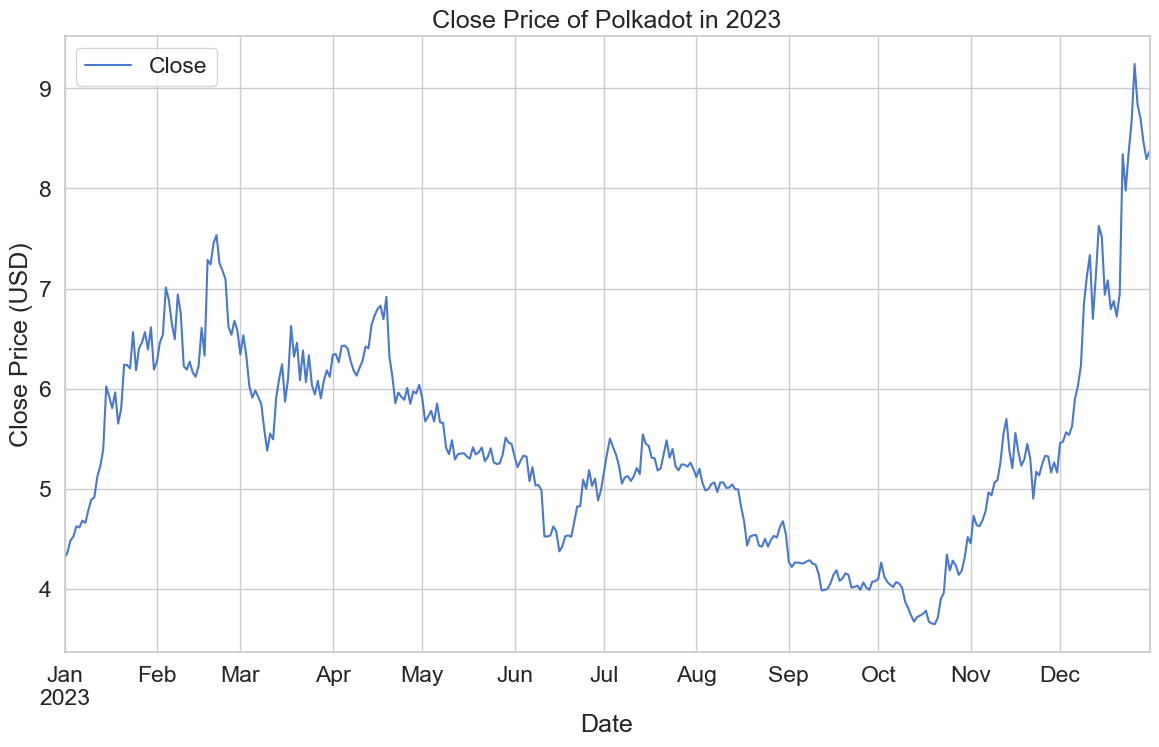

In [14]:
# Visualize the Polkadot close price for 2023
ax = df_2023.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
ax.set_title("Close Price of Polkadot in 2023")

In [15]:
# Add a column called "Log_Returns" with the daily log return of the Close price
df_2023["Log_Returns"] = np.log(df_2023['Close']/df_2023['Close'].shift())
df_2023.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Log_Returns
469,Polkadot,2023-01-01,4.389025,4.305542,4.322374,4.310723,1.938575e+08,4.281996e+09,NaN
468,Polkadot,2023-01-02,4.382929,4.278997,4.310269,4.364916,1.826140e+08,4.270990e+09,0.012493
467,Polkadot,2023-01-03,4.518445,4.325054,4.369715,4.483210,2.674176e+08,4.409971e+09,0.026740
466,Polkadot,2023-01-04,4.537022,4.471537,4.487877,4.523266,2.399604e+08,4.449392e+09,0.008895
465,Polkadot,2023-01-05,4.674906,4.522715,4.522715,4.626480,3.010789e+08,4.573053e+09,0.022562


In [16]:
# We need the std deviation for the volatility of the stock
# df_2023["Log_Returns"].std()

# Volatility is defined as the annualized standard deviation. There are ~253 trading days per year. Square root = **.5
volatility_2023 = df_2023["Log_Returns"].std()*253**.5

In [17]:
# Calculate the volatility of the 2023 stock price of Polkadot
str_vol_2023 = str(round(volatility_2023, 4)*100)

print(str_vol_2023)

52.44


Text(0.5, 1.0, '2023 Polkadot Volatility: 52.44%')

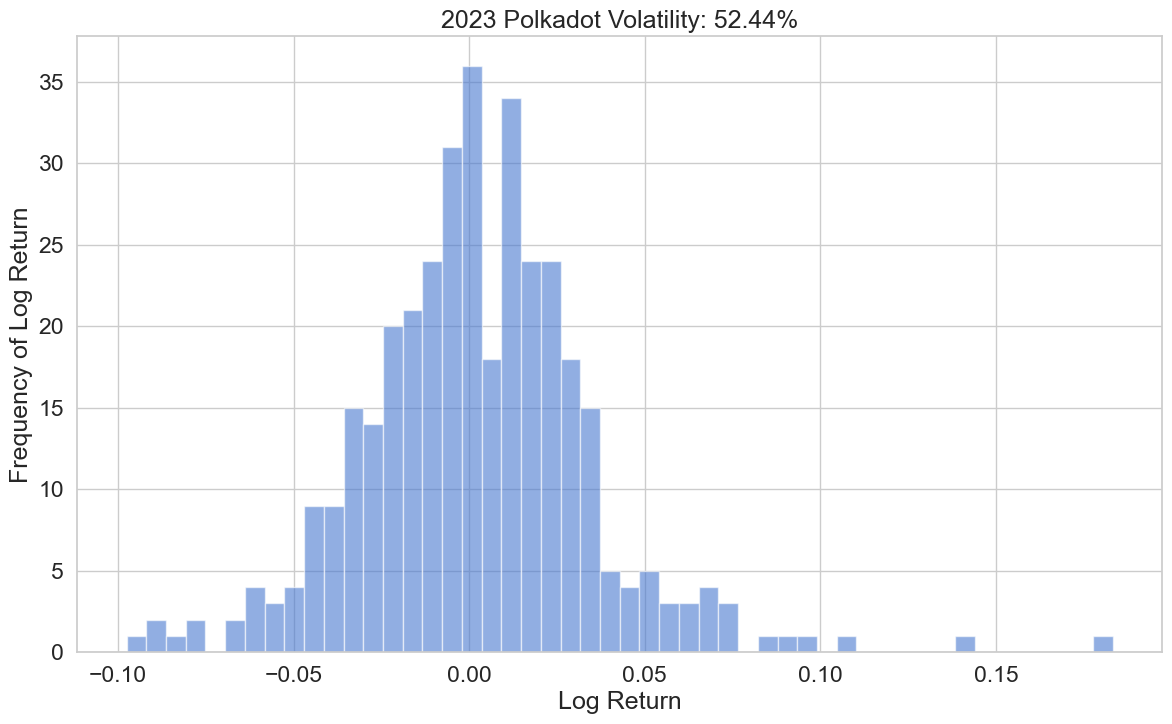

In [18]:
# Visualize the volatility of the 2023 stock price of Polkadot

fig, ax = plt.subplots()
df_2023["Log_Returns"].hist(ax=ax, bins=50, alpha=0.6, color="b")
ax.set_xlabel("Log Return")
ax.set_ylabel("Frequency of Log Return")
ax.set_title("2023 Polkadot Volatility: " + str_vol_2023 + "%" )

# Examine the volatility for the year 2022

In [19]:
# Filter the dates for the year 2022
start_date = "2022-01-01"
end_date = "2022-12-31"

after_start_date = df_sorted["Date"] >= start_date
before_end_date = df_sorted["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
year_2022 = df_sorted.loc[between_two_dates]

print(year_2022)

         Name       Date       High        Low       Open      Close  \
834  Polkadot 2022-01-01  28.120700  26.365861  27.605400  26.790348   
833  Polkadot 2022-01-02  28.567200  26.716550  26.716550  28.514500   
832  Polkadot 2022-01-03  30.544200  27.928300  28.629100  29.702900   
831  Polkadot 2022-01-04  30.813500  28.712809  29.710100  30.112900   
830  Polkadot 2022-01-05  30.499091  28.735253  30.121900  28.754991   
..        ...        ...        ...        ...        ...        ...   
474  Polkadot 2022-12-27   4.563983   4.467563   4.492459   4.563983   
473  Polkadot 2022-12-28   4.568610   4.468477   4.563636   4.478611   
472  Polkadot 2022-12-29   4.480037   4.256031   4.478085   4.284069   
471  Polkadot 2022-12-30   4.350952   4.239761   4.285626   4.312187   
470  Polkadot 2022-12-31   4.334203   4.244394   4.311831   4.322361   

           Volume     Marketcap  
834  1.368133e+09  2.448443e+10  
833  1.136841e+09  2.472113e+10  
832  1.219455e+09  2.612349e+10  

In [20]:
# Create a new dataframe showing only 2022
df_2022 = pd.DataFrame(data=year_2022)
df_2022.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
834,Polkadot,2022-01-01,28.120700,26.365861,27.60540,26.790348,1.368133e+09,2.448443e+10
833,Polkadot,2022-01-02,28.567200,26.716550,26.71655,28.514500,1.136841e+09,2.472113e+10
832,Polkadot,2022-01-03,30.544200,27.928300,28.62910,29.702900,1.219455e+09,2.612349e+10
831,Polkadot,2022-01-04,30.813500,28.712809,29.71010,30.112900,2.005000e+09,2.664061e+10
830,Polkadot,2022-01-05,30.499091,28.735253,30.12190,28.754991,2.179824e+09,2.668067e+10


Text(0.5, 1.0, 'Close Price of Polkadot in 2022')

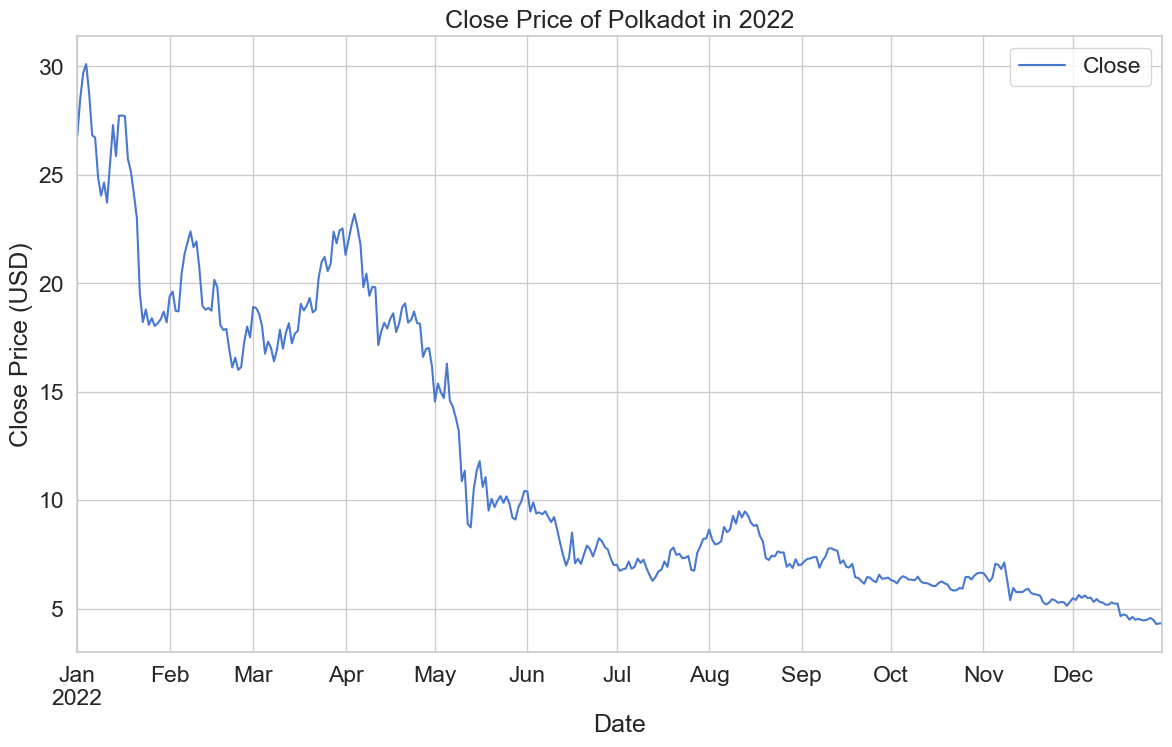

In [22]:
# Visualize the Polkadot close price for 2022
ax = df_2022.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
ax.set_title("Close Price of Polkadot in 2022")

In [23]:
# Add a column called "Log_Returns" with the daily log return of the Close price
df_2022["Log_Returns"] = np.log(df_2022['Close']/df_2022['Close'].shift())
df_2022.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Log_Returns
834,Polkadot,2022-01-01,28.120700,26.365861,27.60540,26.790348,1.368133e+09,2.448443e+10,NaN
833,Polkadot,2022-01-02,28.567200,26.716550,26.71655,28.514500,1.136841e+09,2.472113e+10,0.062371
832,Polkadot,2022-01-03,30.544200,27.928300,28.62910,29.702900,1.219455e+09,2.612349e+10,0.040832
831,Polkadot,2022-01-04,30.813500,28.712809,29.71010,30.112900,2.005000e+09,2.664061e+10,0.013709
830,Polkadot,2022-01-05,30.499091,28.735253,30.12190,28.754991,2.179824e+09,2.668067e+10,-0.046142


In [24]:
# We need the std deviation for the volatility of the stock
# df_2022["Log_Returns"].std()

# Volatility is defined as the annualized standard deviation. There are ~253 trading days per year. Square root = **.5
volatility_2022 = df_2022["Log_Returns"].std()*253**.5

In [25]:
# Calculate the volatility of the 2022 stock price of Polkadot
str_vol_2022 = str(round(volatility_2022, 3)*100)

print(str_vol_2022)

78.0


Text(0.5, 1.0, '2022 Polkadot Volatility: 78.0%')

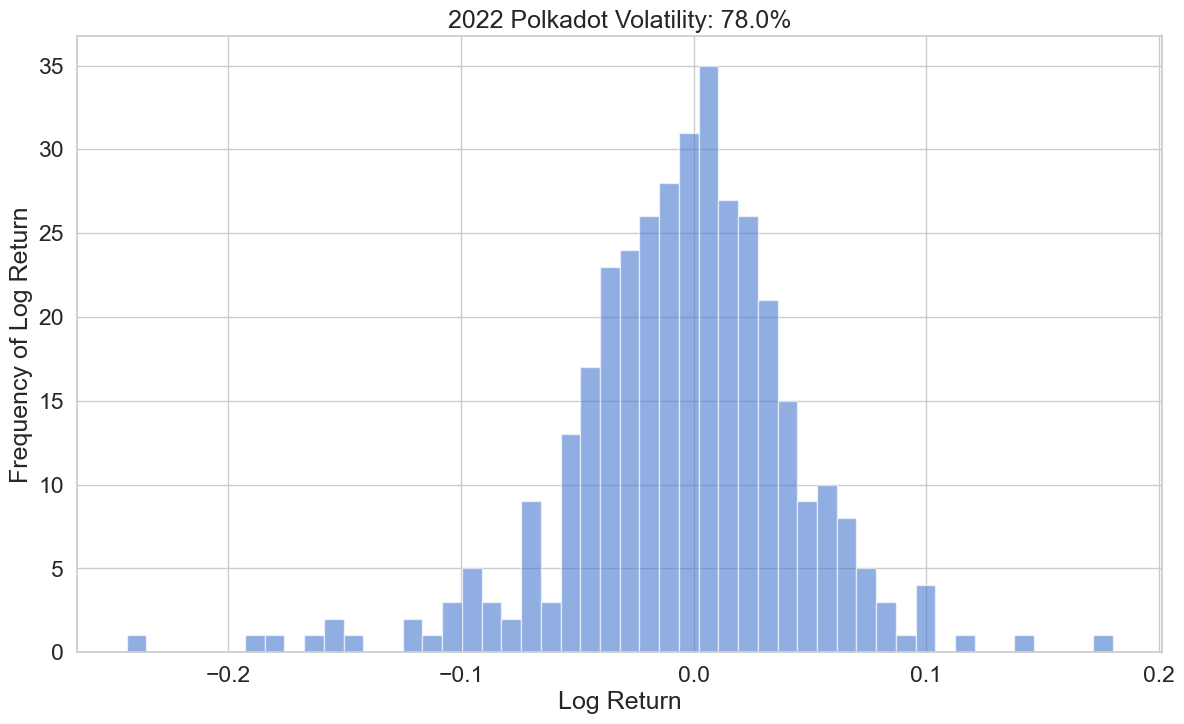

In [38]:
# Visualize the volatility of the 2022 stock price of Polkadot

fig, ax = plt.subplots()
df_2022["Log_Returns"].hist(ax=ax, bins=50, alpha=0.6, color="b")
ax.set_xlabel("Log Return")
ax.set_ylabel("Frequency of Log Return")
ax.set_title("2022 Polkadot Volatility: " + str_vol_2022 + "%" )

# Examine the volatility for the year 2021

In [27]:
# Filter the dates for the year 2021
start_date = "2021-01-01"
end_date = "2021-12-31"

after_start_date = df_sorted["Date"] >= start_date
before_end_date = df_sorted["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
year_2021 = df_sorted.loc[between_two_dates]

print(year_2021)

          Name       Date       High        Low       Open      Close  \
1199  Polkadot 2021-01-01   9.402118   7.200386   7.248474   9.402118   
1198  Polkadot 2021-01-02   9.417222   8.142511   9.286189   8.315248   
1197  Polkadot 2021-01-03   9.510744   7.984163   8.303197   9.046759   
1196  Polkadot 2021-01-04  10.192358   8.831527   9.062814   9.965805   
1195  Polkadot 2021-01-05  10.253248   8.917678   9.879722   9.435646   
...        ...        ...        ...        ...        ...        ...   
839   Polkadot 2021-12-27  31.690882  28.367700  28.858008  31.380763   
838   Polkadot 2021-12-28  32.669100  30.958933  31.312630  30.958933   
837   Polkadot 2021-12-29  30.949395  27.677128  30.949395  27.982300   
836   Polkadot 2021-12-30  28.894204  26.731120  27.874500  26.785893   
835   Polkadot 2021-12-31  28.380021  26.341553  26.804586  27.636600   

            Volume     Marketcap  
1199  2.086647e+09  7.263687e+09  
1198  2.699083e+09  7.866519e+09  
1197  2.510469e+09

In [28]:
# Create a new dataframe showing only 2021
df_2021 = pd.DataFrame(data=year_2021)
df_2021.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap
1199,Polkadot,2021-01-01,9.402118,7.200386,7.248474,9.402118,2.086647e+09,7.263687e+09
1198,Polkadot,2021-01-02,9.417222,8.142511,9.286189,8.315248,2.699083e+09,7.866519e+09
1197,Polkadot,2021-01-03,9.510744,7.984163,8.303197,9.046759,2.510469e+09,7.831085e+09
1196,Polkadot,2021-01-04,10.192358,8.831527,9.062814,9.965805,2.619159e+09,8.304504e+09
1195,Polkadot,2021-01-05,10.253248,8.917678,9.879722,9.435646,3.089225e+09,8.593694e+09


Text(0.5, 1.0, 'Close Price of Polkadot in 2021')

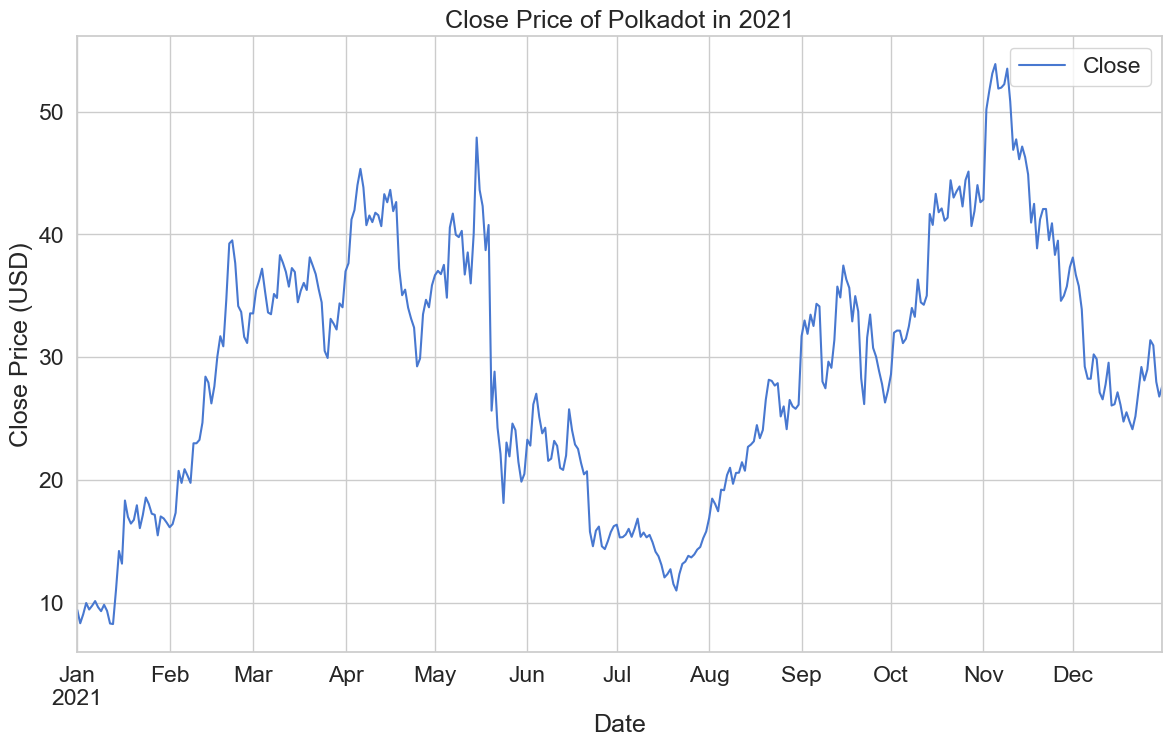

In [30]:
# Visualize the Polkadot close price for 2021
ax = df_2021.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
ax.set_title("Close Price of Polkadot in 2021")

In [31]:
# Add a column called "Log_Returns" with the daily log return of the Close price
df_2021["Log_Returns"] = np.log(df_2021['Close']/df_2021['Close'].shift())
df_2021.head()

,Name,Date,High,Low,Open,Close,Volume,Marketcap,Log_Returns
1199,Polkadot,2021-01-01,9.402118,7.200386,7.248474,9.402118,2.086647e+09,7.263687e+09,NaN
1198,Polkadot,2021-01-02,9.417222,8.142511,9.286189,8.315248,2.699083e+09,7.866519e+09,-0.122844
1197,Polkadot,2021-01-03,9.510744,7.984163,8.303197,9.046759,2.510469e+09,7.831085e+09,0.084316
1196,Polkadot,2021-01-04,10.192358,8.831527,9.062814,9.965805,2.619159e+09,8.304504e+09,0.096753
1195,Polkadot,2021-01-05,10.253248,8.917678,9.879722,9.435646,3.089225e+09,8.593694e+09,-0.054665


In [32]:
# We need the std deviation for the volatility of the stock
# df_2021["Log_Returns"].std()

# Volatility is defined as the annualized standard deviation. There are ~253 trading days per year. Square root = **.5
volatility_2021 = df_2021["Log_Returns"].std()*253**.5

In [34]:
# Calculate the volatility of the 2021 stock price of Polkadot
str_vol_2021 = str(round(volatility_2021, 2)*100)

print(str_vol_2021)

121.0


Text(0.5, 1.0, '2021 Polkadot Volatility: 121.0%')

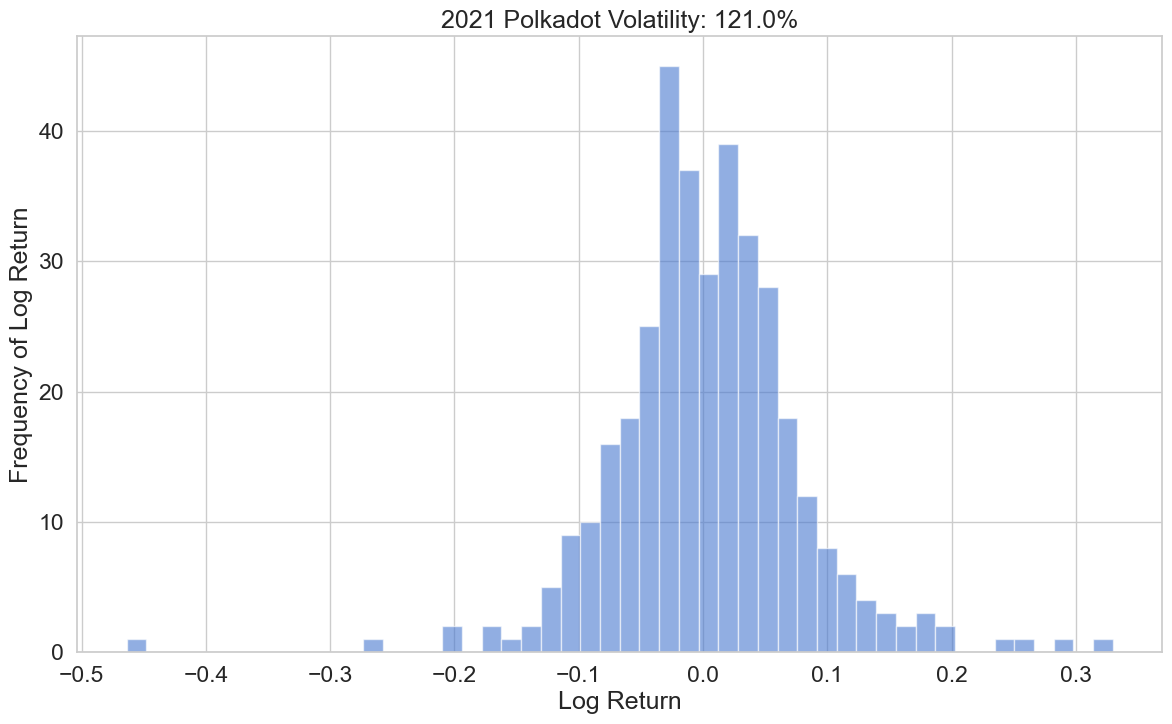

In [35]:
# Visualize the volatility of the 2021 stock price of Polkadot

fig, ax = plt.subplots()
df_2021["Log_Returns"].hist(ax=ax, bins=50, alpha=0.6, color="b")
ax.set_xlabel("Log Return")
ax.set_ylabel("Frequency of Log Return")
ax.set_title("2021 Polkadot Volatility: " + str_vol_2021 + "%" )

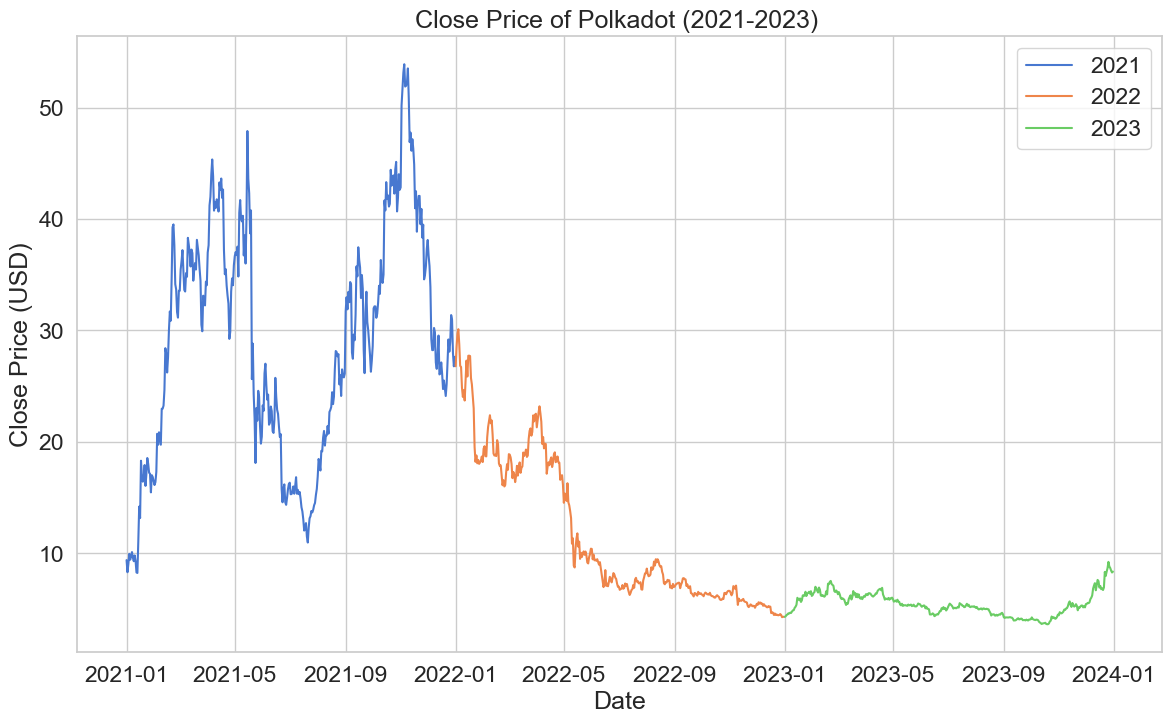

In [36]:
# Overlay the close price for 2021-2023

x1 = df_2021["Date"]
x2 = df_2022["Date"]
x3 = df_2023["Date"]

a = df_2021["Close"].values
b = df_2022["Close"].values
c = df_2023["Close"].values


plt.plot(x1, a, label= "2021" )
plt.plot(x2, b, label= "2022" )
plt.plot(x3, c, label= "2023" )

plt.title("Close Price of Polkadot (2021-2023) ")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")

plt.legend()
plt.show()

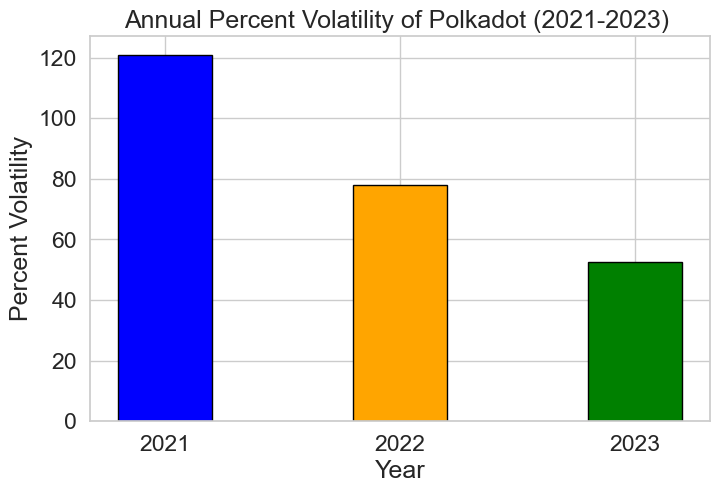

In [37]:
# Visualize the volatility percent as a bar chart
# plt.bar(x, height, width, bottom, align)

year = ["2021", "2022", "2023"]
values = [float(str_vol_2021), float(str_vol_2022), float(str_vol_2023)]

colors = ["blue", "orange", "green"]

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(x=year, height=values, color=colors, edgecolor='black', width = 0.4, bottom=0)
 
plt.xlabel("Year")
plt.ylabel("Percent Volatility")
plt.title("Annual Percent Volatility of Polkadot (2021-2023) ")
plt.show()